In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
import dgl_functions
from dgl_functions import *
import dgl_models
from dgl_models import *

In [4]:
from custom_models_fingerprints import *

In [5]:
use_fingerprints = False

apply_scaffold_split = True

create_new_data = False

In [6]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "DGL"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_dgl_classification/model_gnn_conv"
    else:
        filename_basic = "results_dgl_classification/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_dgl_classification_scaffold/model_gnn_conv"
    else:
        filename_basic = "results_dgl_classification_scaffold/model_gnn_conv"

apply_scaffold_split = False

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [7]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512], [512, 256]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [8]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [9]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [10]:
batch_size = 1024

In [11]:
print(len(combinations))

108


In [12]:
param_combinations = dict()

hidden_feats = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [128], [128, 128], [128, 128, 128], [128, 128, 128, 128], [256], [256, 256], [256, 256, 256], [256, 256, 256, 256], [512], [512, 512], [512, 512, 512], [512, 512, 512, 512]]

predictor_hidden_feats = [128, 256, 512, 1024]
keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [13]:
param_combinations = dict()


param_combinations["hidden_feats"] = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [128], [128, 128], [128, 128, 128], [128, 128, 128, 128], [256], [256, 256], [256, 256, 256], [256, 256, 256, 256]]
param_combinations["predictor_hidden_feats"] = [128, 256, 512]
apply_scaffold_split_list = [apply_scaffold_split]
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

run: 0
{'hidden_feats': [64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}


[<torch.utils.data.dataset.Subset object at 0x0000027927D133A0>, <torch.utils.data.dataset.Subset object at 0x000002794A7225B0>, <torch.utils.data.dataset.Subset object at 0x000002794A722AF0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=128, out_features=128, bias=True)


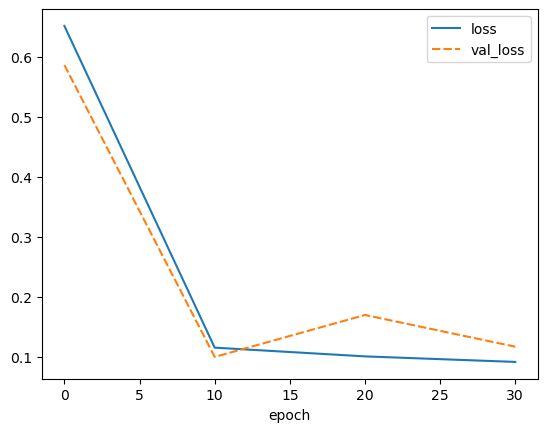

best weights loaded


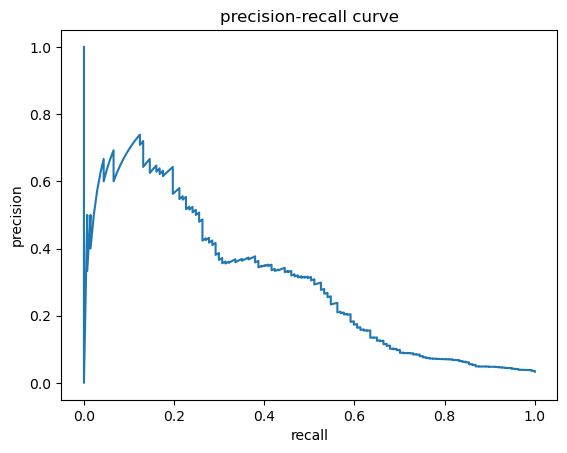

elapsed time: 296.6543321609497
run: 1
{'hidden_feats': [64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027932ACE190>, <torch.utils.data.dataset.Subset object at 0x0000027A5C529D60>, <torch.utils.data.dataset.Subset object at 0x0000027A5C529A00>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
   

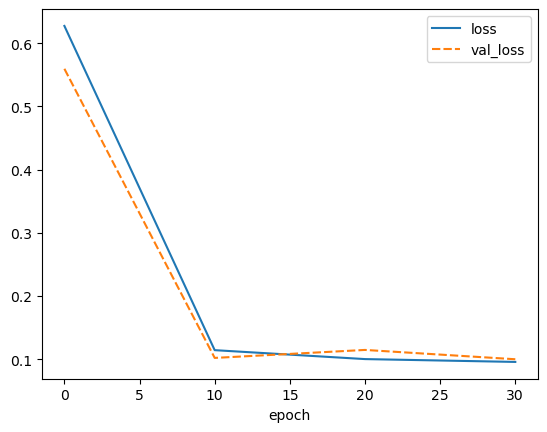

best weights loaded


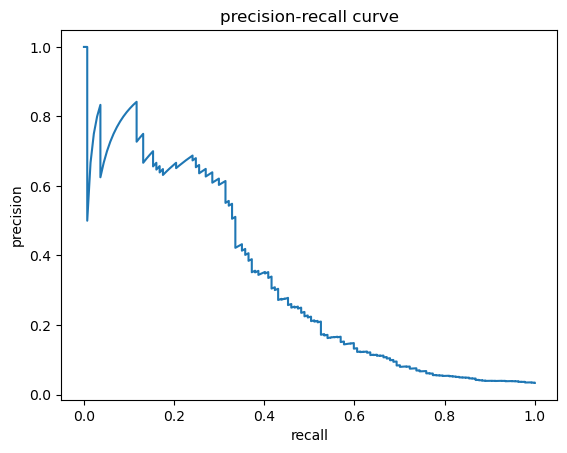

elapsed time: 290.50283217430115
run: 2
{'hidden_feats': [64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002793C833CD0>, <torch.utils.data.dataset.Subset object at 0x0000027A677815E0>, <torch.utils.data.dataset.Subset object at 0x0000027A67781AF0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
  

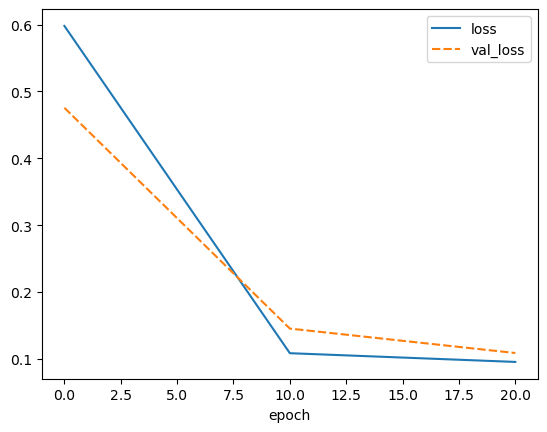

best weights loaded


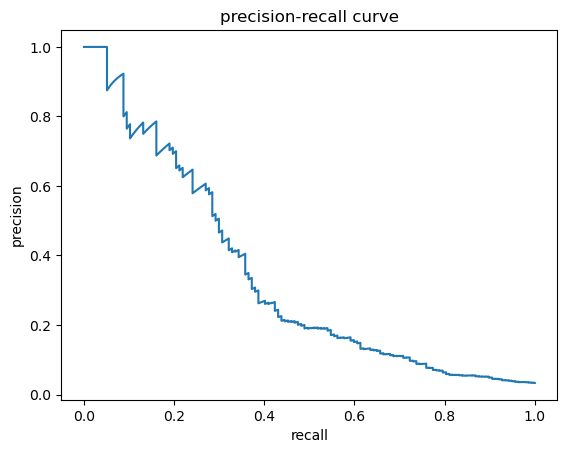

elapsed time: 268.6989731788635
run: 3
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027943C2C880>, <torch.utils.data.dataset.Subset object at 0x0000027A5C4D81C0>, <torch.utils.data.dataset.Subset object at 0x0000027A5C4D8C70>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_feat

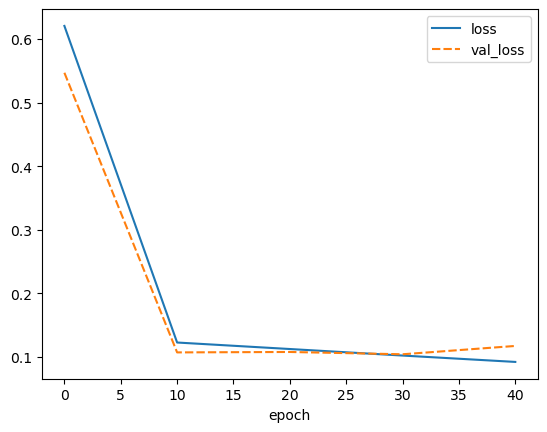

best weights loaded


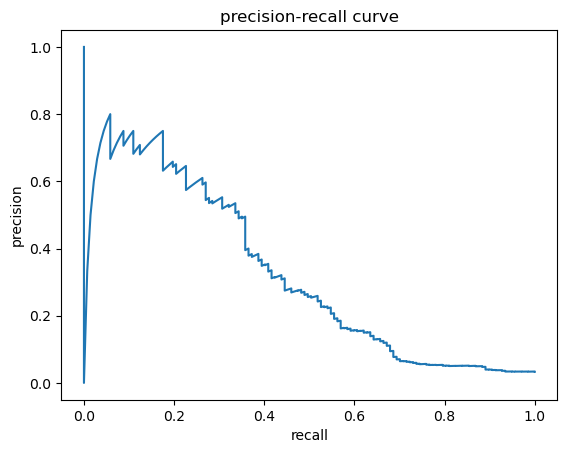

elapsed time: 332.1244134902954
run: 4
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027949162670>, <torch.utils.data.dataset.Subset object at 0x0000027A6A720040>, <torch.utils.data.dataset.Subset object at 0x0000027A6A720520>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_feat

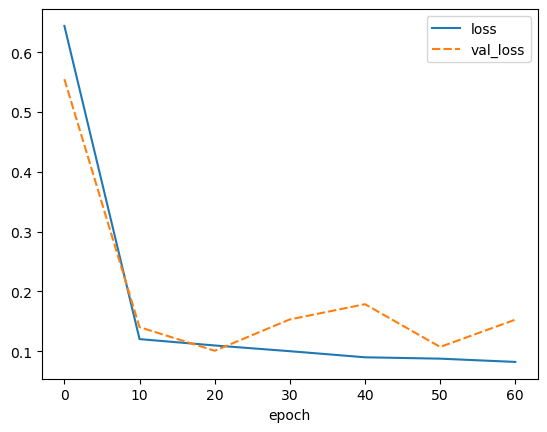

best weights loaded


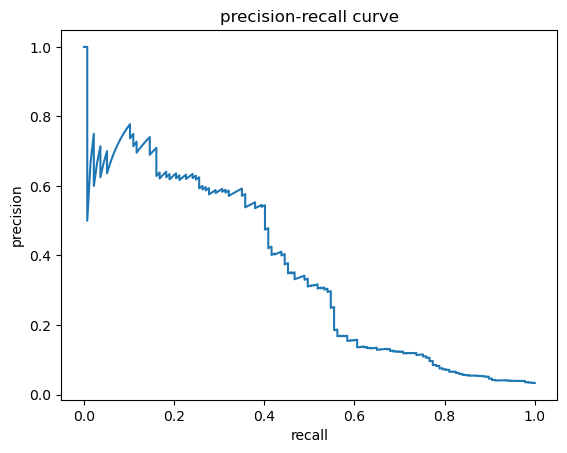

elapsed time: 439.69214963912964
run: 5
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002793B291850>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7077C0>, <torch.utils.data.dataset.Subset object at 0x0000027A5C529790>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_fea

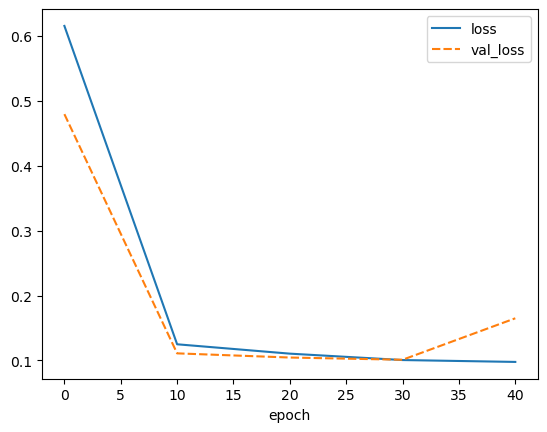

best weights loaded


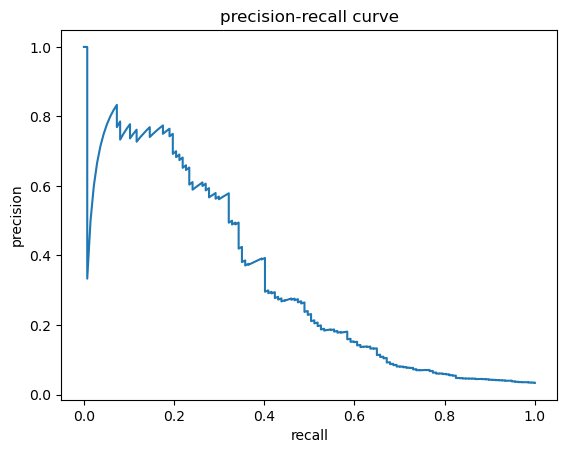

elapsed time: 340.4929099082947
run: 6
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002793E48BB80>, <torch.utils.data.dataset.Subset object at 0x0000027954515A00>, <torch.utils.data.dataset.Subset object at 0x00000279545430D0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64

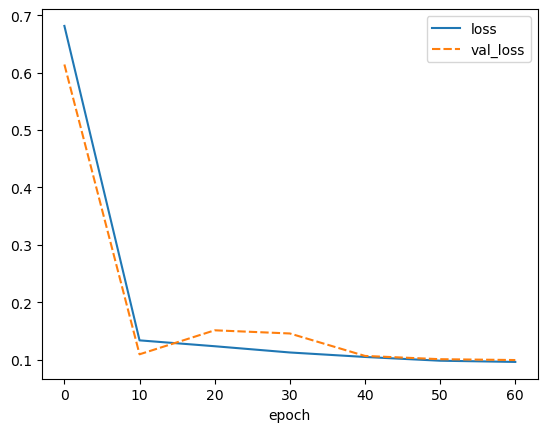

best weights loaded


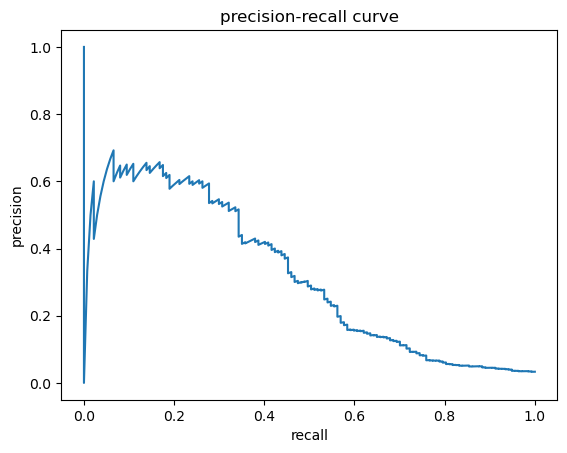

elapsed time: 432.28933548927307
run: 7
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027935DEEDF0>, <torch.utils.data.dataset.Subset object at 0x0000027A6A742C40>, <torch.utils.data.dataset.Subset object at 0x0000027A6A747190>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=6

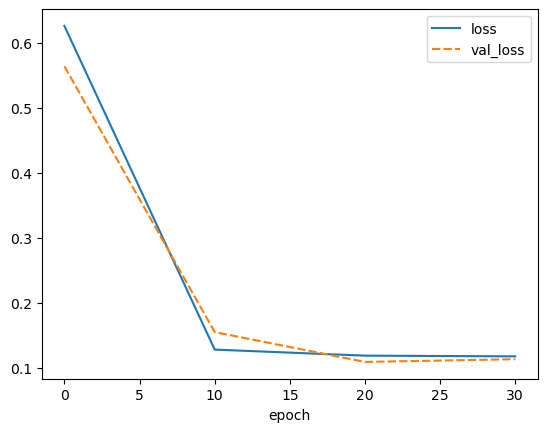

best weights loaded


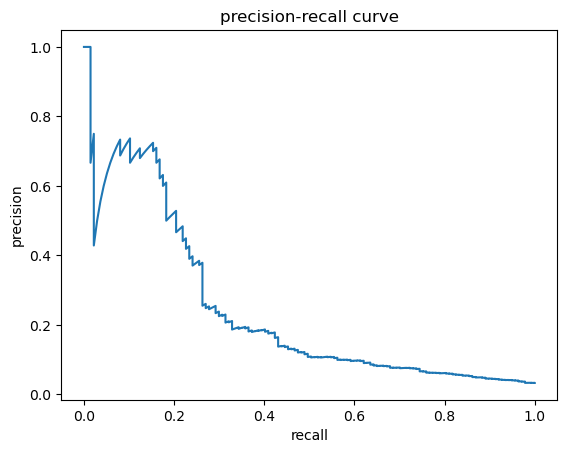

elapsed time: 318.0730311870575
run: 8
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002793606C880>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7474F0>, <torch.utils.data.dataset.Subset object at 0x0000027A6A747850>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64

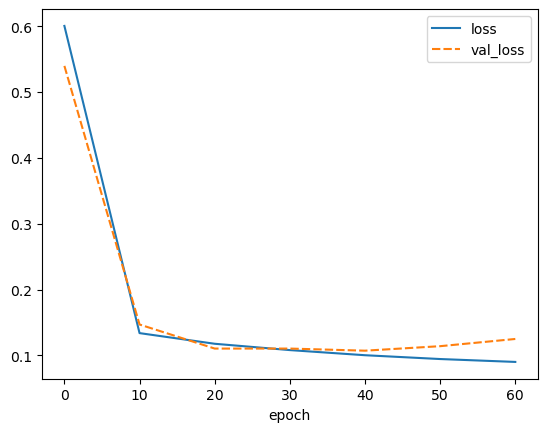

best weights loaded


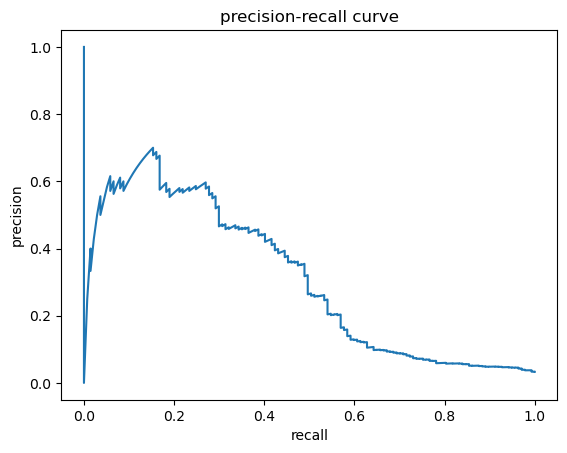

elapsed time: 450.17667865753174
run: 9
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002792EB1F610>, <torch.utils.data.dataset.Subset object at 0x0000027A6A74E4C0>, <torch.utils.data.dataset.Subset object at 0x0000027A6A74EC40>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_featur

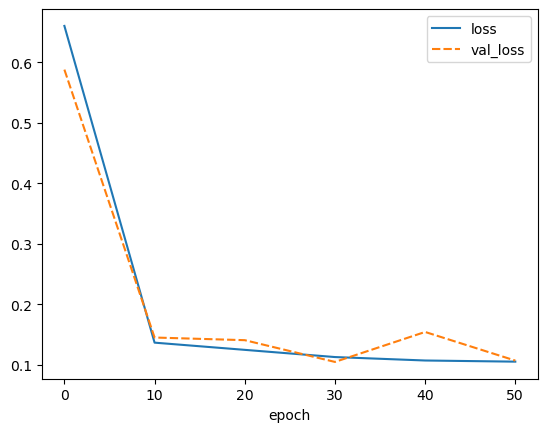

best weights loaded


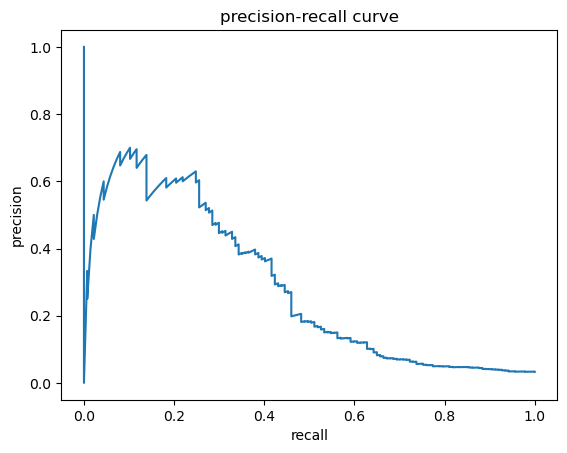

elapsed time: 382.1142873764038
run: 10
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002793070B130>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7439D0>, <torch.utils.data.dataset.Subset object at 0x0000027A6A763100>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_featur

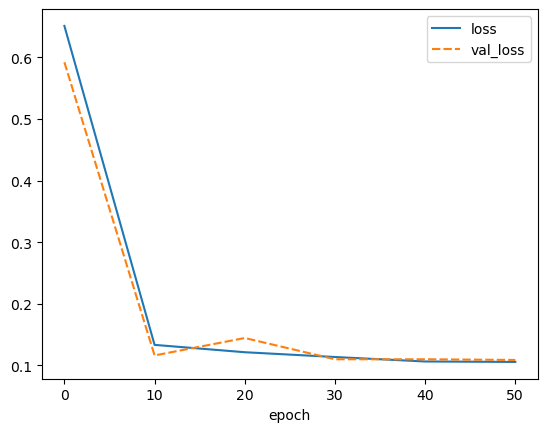

best weights loaded


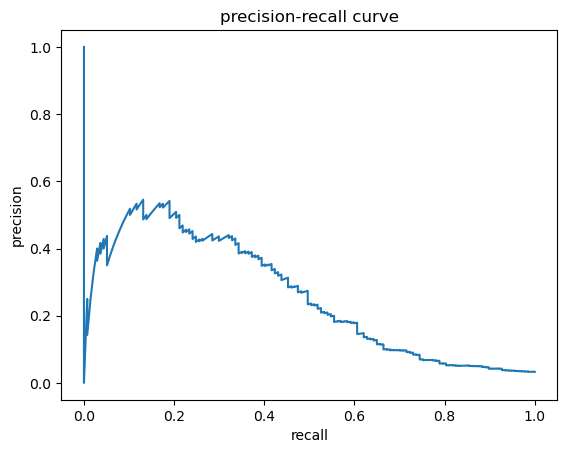

elapsed time: 401.4581182003021
run: 11
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027928290910>, <torch.utils.data.dataset.Subset object at 0x000002793CAA7040>, <torch.utils.data.dataset.Subset object at 0x000002793CAA72B0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_featur

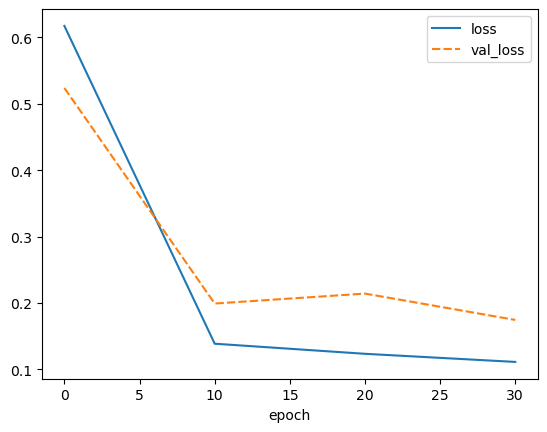

best weights loaded


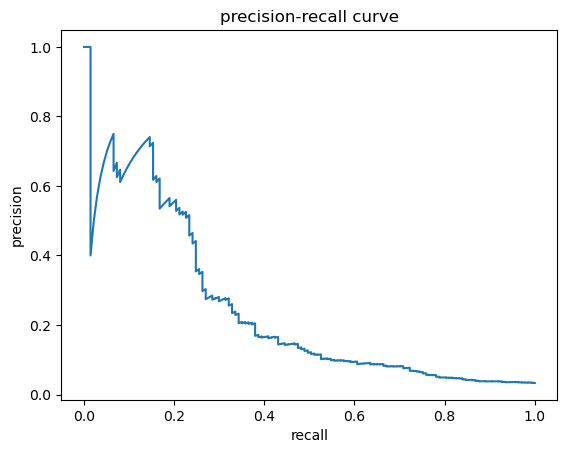

elapsed time: 313.6603534221649
run: 12
{'hidden_feats': [128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002792A03FD00>, <torch.utils.data.dataset.Subset object at 0x0000027A674A94C0>, <torch.utils.data.dataset.Subset object at 0x0000027A674A99D0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredicto

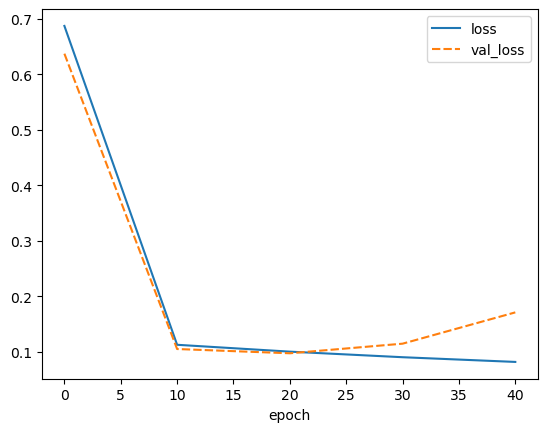

best weights loaded


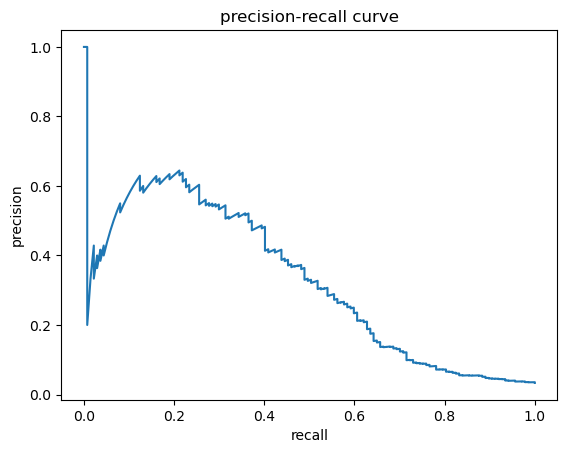

elapsed time: 318.06290793418884
run: 13
{'hidden_feats': [128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027948CAE610>, <torch.utils.data.dataset.Subset object at 0x0000027A0EACD430>, <torch.utils.data.dataset.Subset object at 0x0000027A0EACD940>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredict

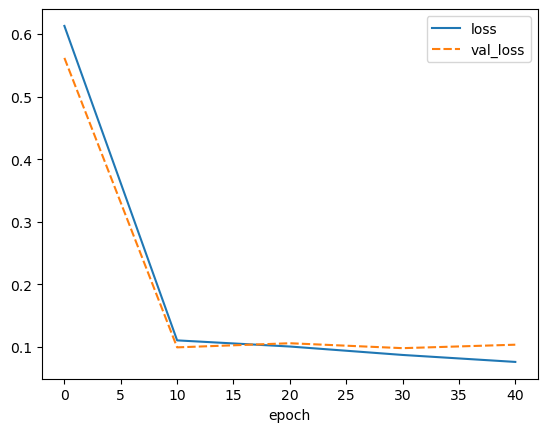

best weights loaded


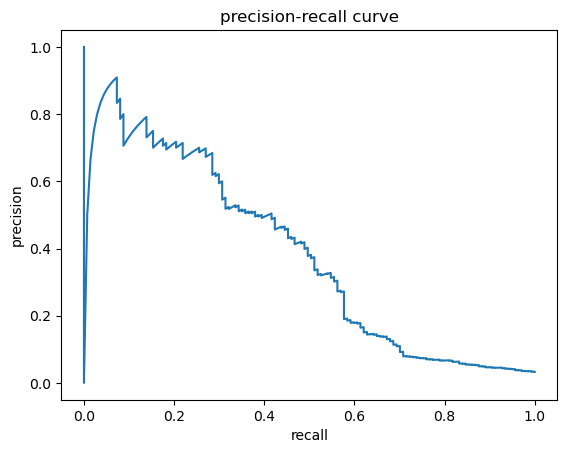

elapsed time: 315.08449029922485
run: 14
{'hidden_feats': [128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000279456AE9D0>, <torch.utils.data.dataset.Subset object at 0x000002792EB4CB20>, <torch.utils.data.dataset.Subset object at 0x000002792EB4CF40>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredict

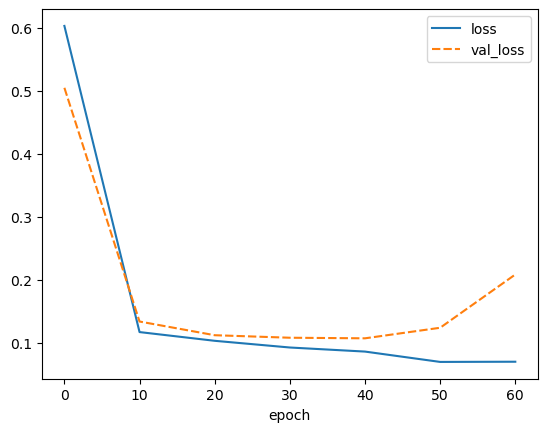

best weights loaded


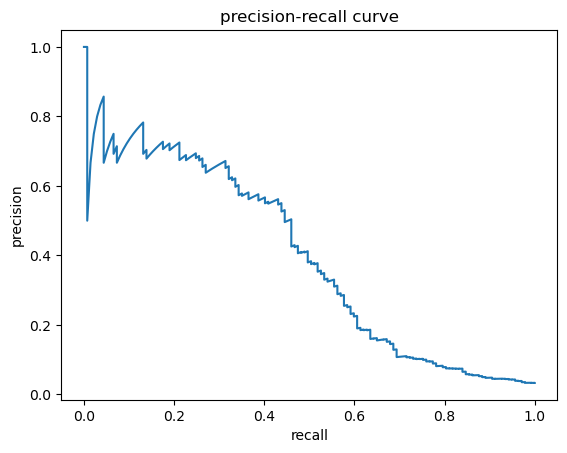

elapsed time: 324.6586880683899
run: 15
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000279392B78E0>, <torch.utils.data.dataset.Subset object at 0x0000027A55C070D0>, <torch.utils.data.dataset.Subset object at 0x000002792EB4CB50>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128,

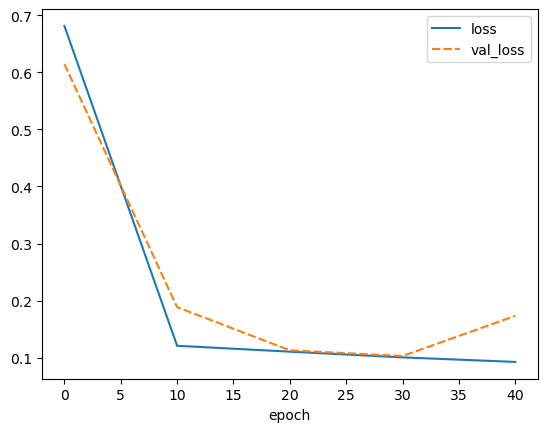

best weights loaded


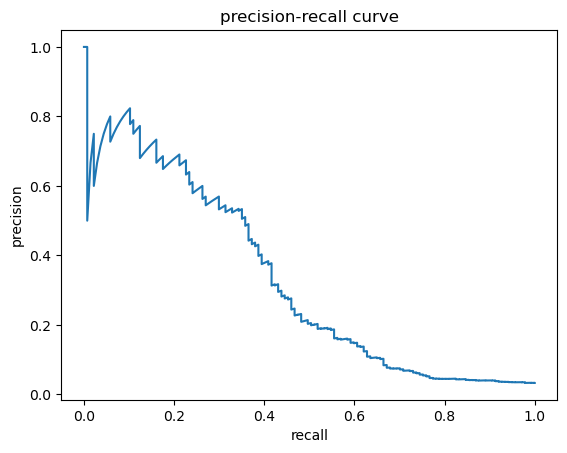

elapsed time: 365.4248170852661
run: 16
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027A386FA310>, <torch.utils.data.dataset.Subset object at 0x0000027A6A797BB0>, <torch.utils.data.dataset.Subset object at 0x0000027A6A797220>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128,

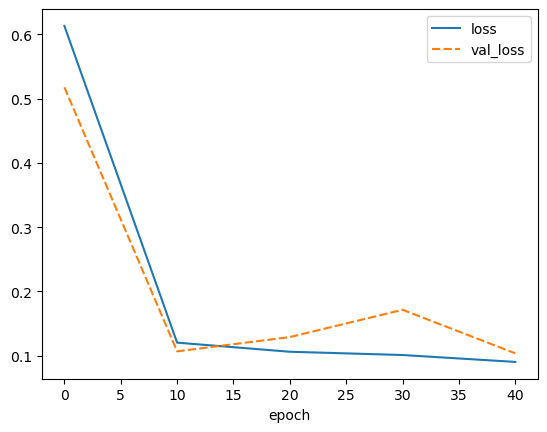

best weights loaded


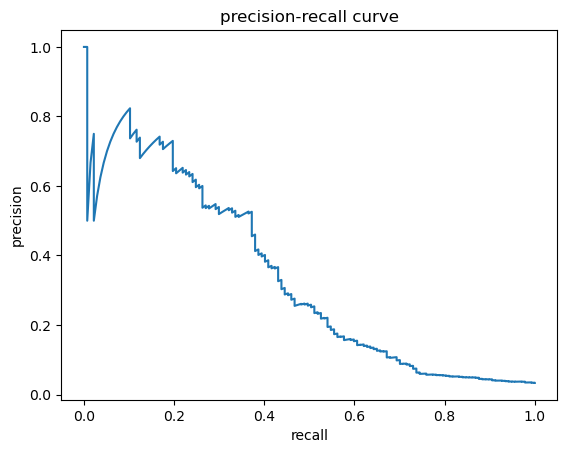

elapsed time: 377.532231092453
run: 17
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002793484D190>, <torch.utils.data.dataset.Subset object at 0x0000027A5C3CD220>, <torch.utils.data.dataset.Subset object at 0x0000027A5C3CD2E0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, 

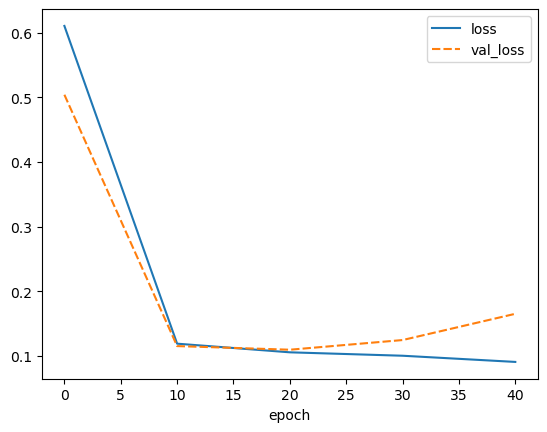

best weights loaded


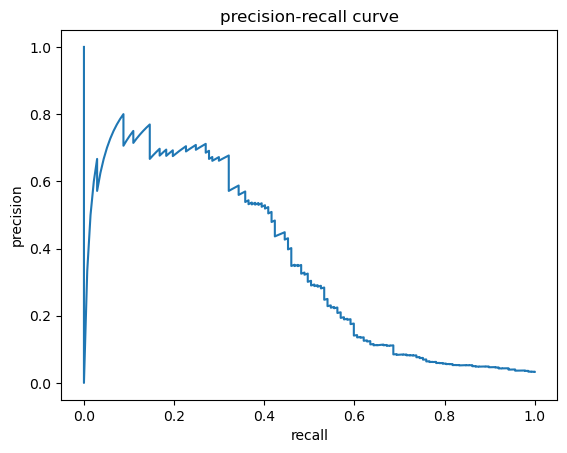

elapsed time: 348.99555349349976
run: 18
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027943E9CC40>, <torch.utils.data.dataset.Subset object at 0x000002792EB4C5B0>, <torch.utils.data.dataset.Subset object at 0x000002792EB4C520>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_f

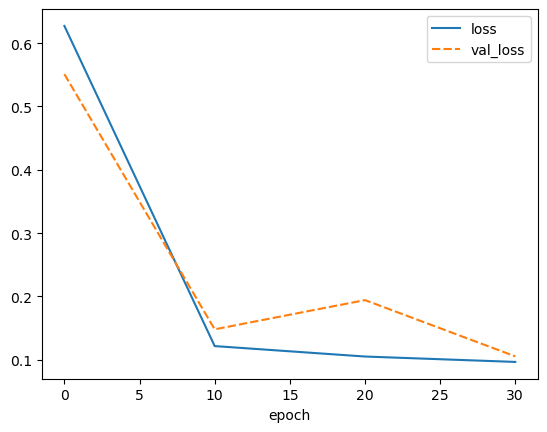

best weights loaded


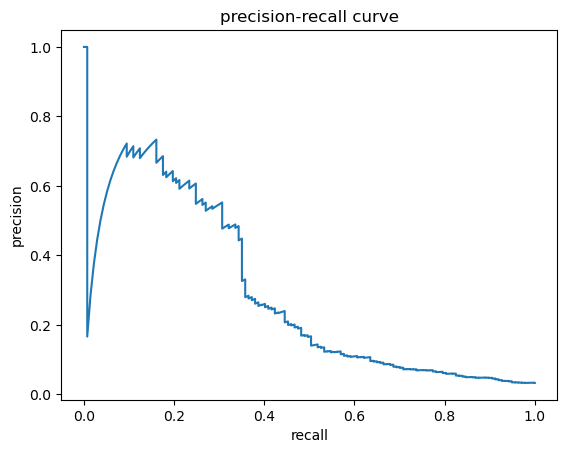

elapsed time: 317.5323438644409
run: 19
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002792B168A00>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7BB400>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7BBA00>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

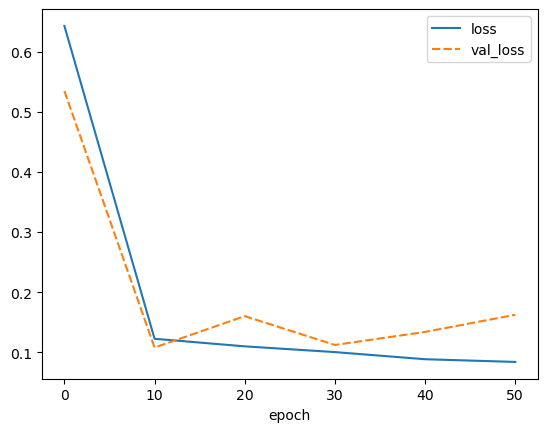

best weights loaded


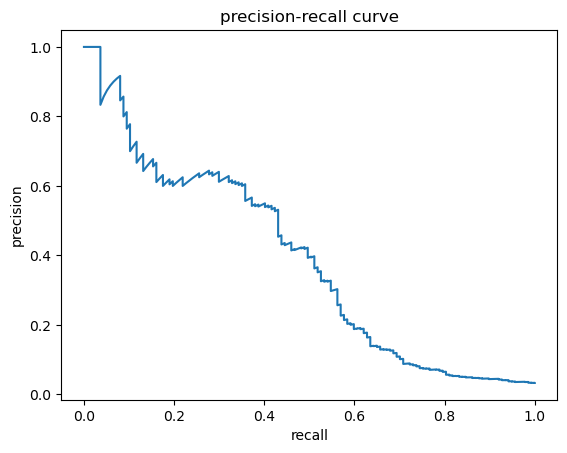

elapsed time: 407.2779107093811
run: 20
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002792B1C4820>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7C1130>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7C1730>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

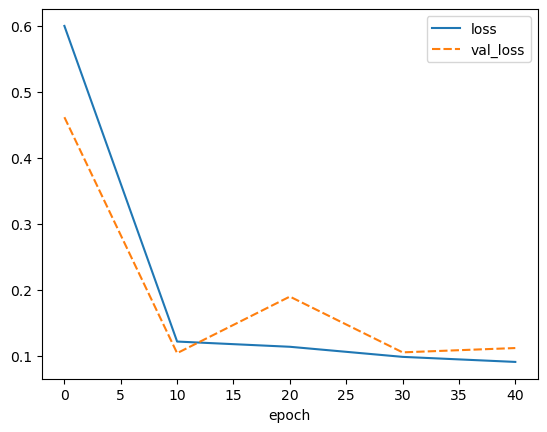

best weights loaded


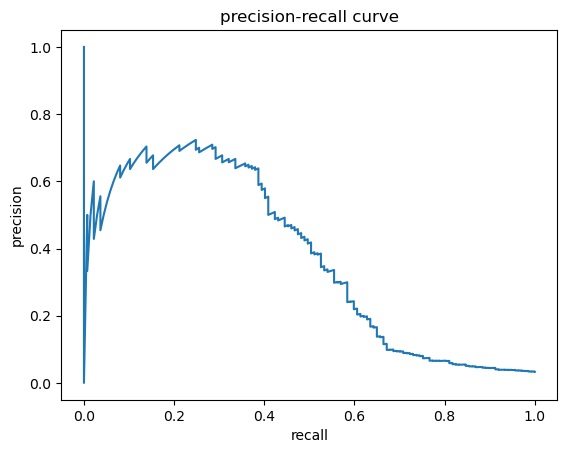

elapsed time: 314.67537784576416
run: 21
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000279428E2220>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7CA280>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7CAA90>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear

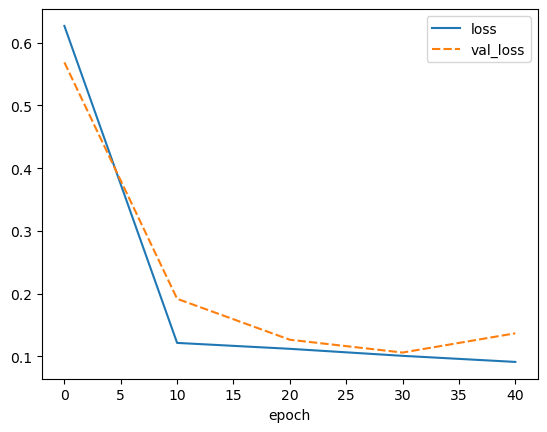

best weights loaded


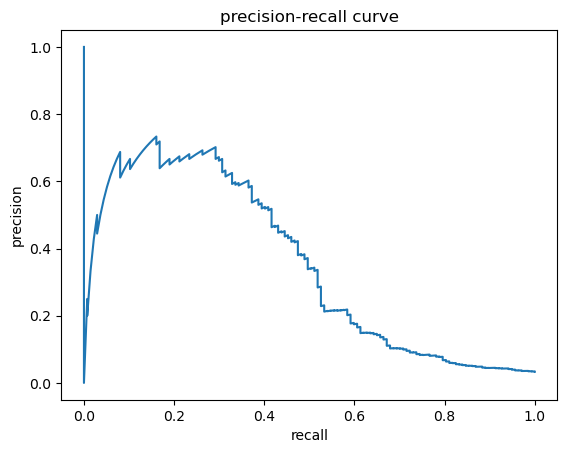

elapsed time: 301.05440044403076
run: 22
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027929909130>, <torch.utils.data.dataset.Subset object at 0x0000027A3C49F250>, <torch.utils.data.dataset.Subset object at 0x0000027A3C49F4F0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear

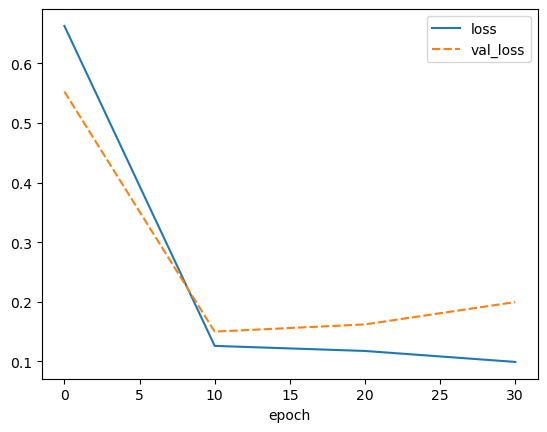

best weights loaded


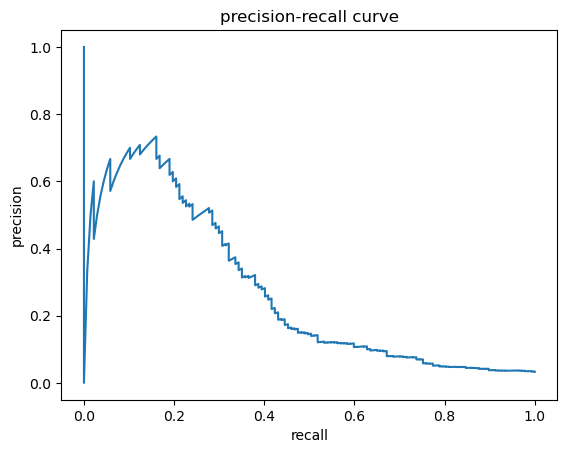

elapsed time: 310.0497040748596
run: 23
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000279470E96D0>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7A46A0>, <torch.utils.data.dataset.Subset object at 0x0000027A3C4A3A00>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(

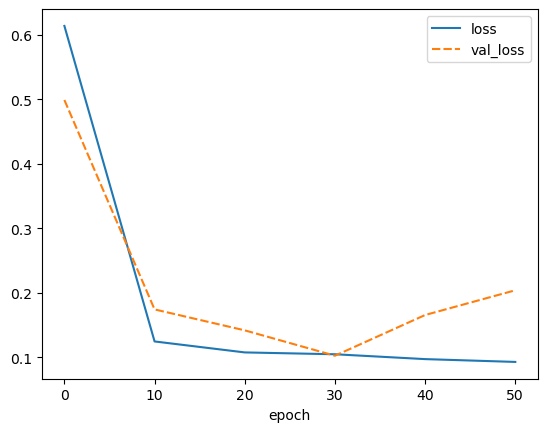

best weights loaded


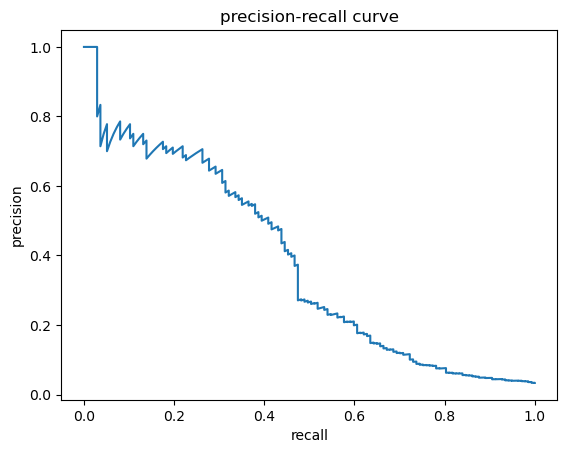

elapsed time: 402.97668838500977
run: 24
{'hidden_feats': [256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027942A86D60>, <torch.utils.data.dataset.Subset object at 0x0000027929DECD30>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7CF190>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredict

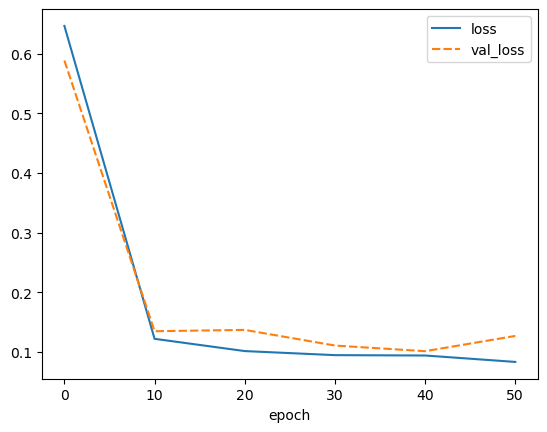

best weights loaded


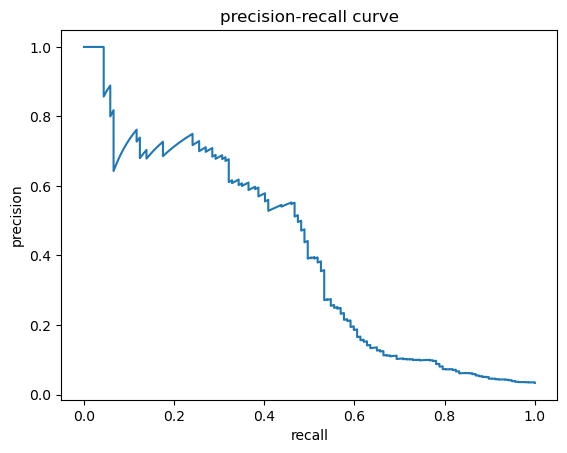

elapsed time: 357.74344062805176
run: 25
{'hidden_feats': [256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002793C7F1670>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7E60A0>, <torch.utils.data.dataset.Subset object at 0x0000027A6A7E63D0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredict

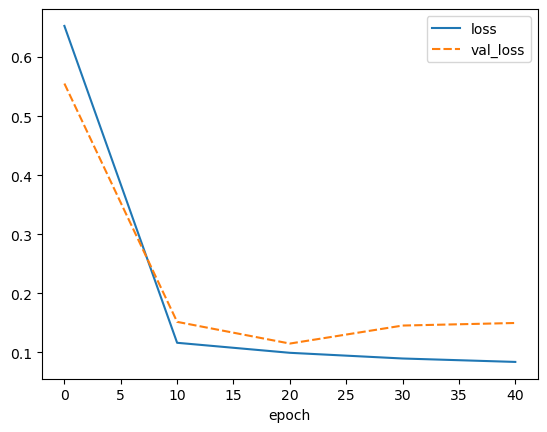

best weights loaded


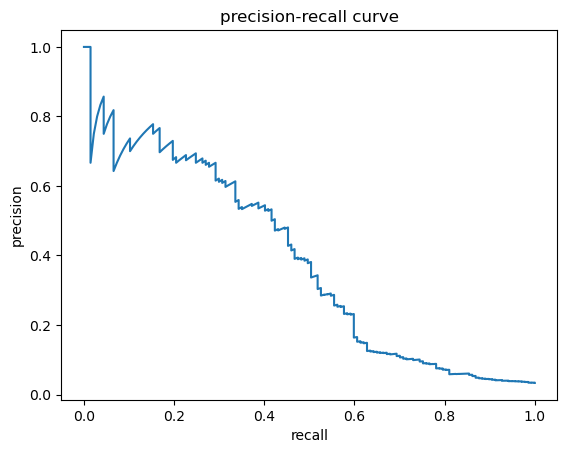

elapsed time: 289.827894449234
run: 26
{'hidden_feats': [256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027948CF8BB0>, <torch.utils.data.dataset.Subset object at 0x0000027955B94C70>, <torch.utils.data.dataset.Subset object at 0x000002793E8921C0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor

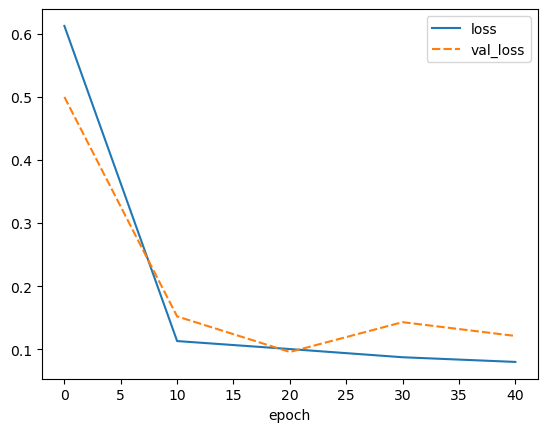

best weights loaded


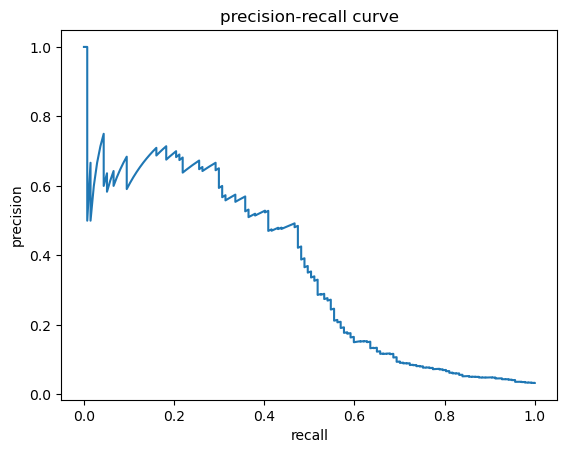

elapsed time: 271.9320333003998
run: 27
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027934913940>, <torch.utils.data.dataset.Subset object at 0x0000027A33AF2250>, <torch.utils.data.dataset.Subset object at 0x0000027A33AF2670>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256,

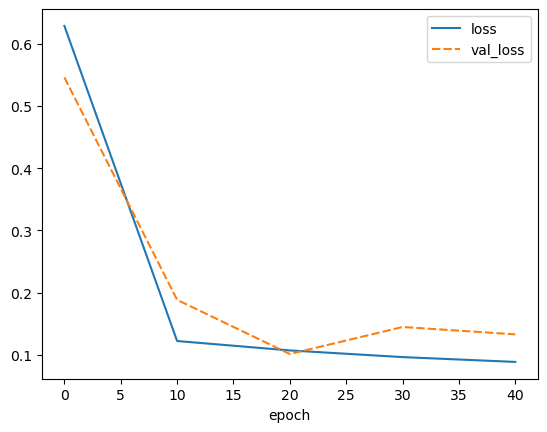

best weights loaded


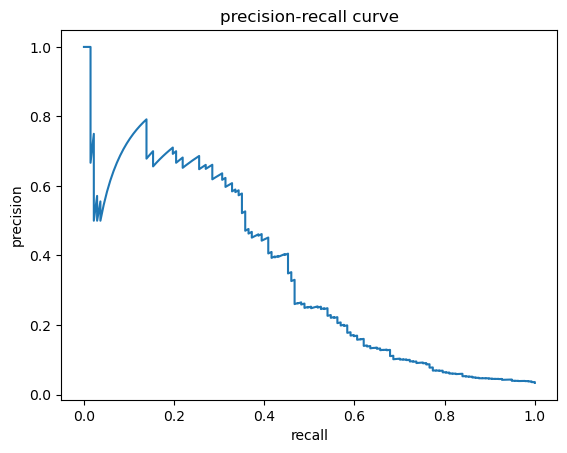

elapsed time: 281.18707633018494
run: 28
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027935C1D880>, <torch.utils.data.dataset.Subset object at 0x0000027934913490>, <torch.utils.data.dataset.Subset object at 0x0000027934913AF0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256

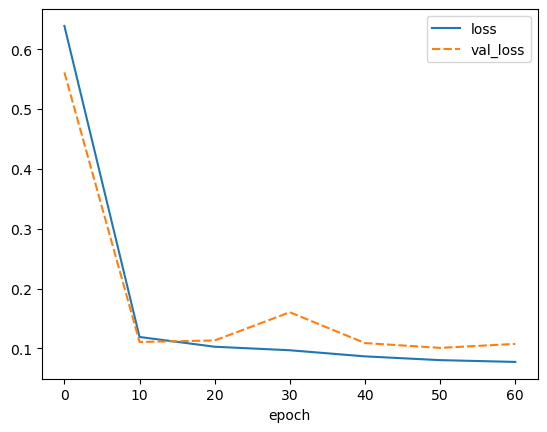

best weights loaded


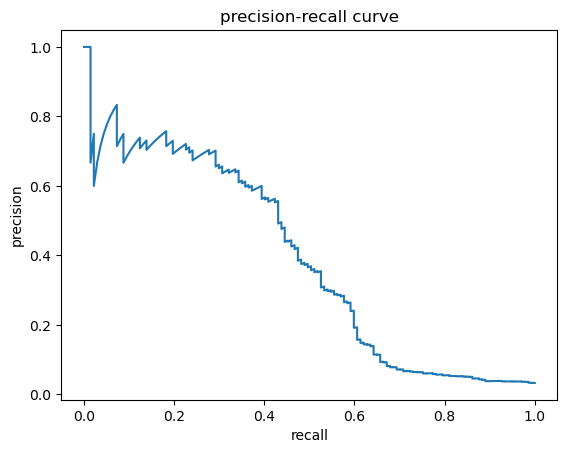

elapsed time: 357.1789433956146
run: 29
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002792D1D4340>, <torch.utils.data.dataset.Subset object at 0x0000027A6A805910>, <torch.utils.data.dataset.Subset object at 0x0000027A6A805E50>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256,

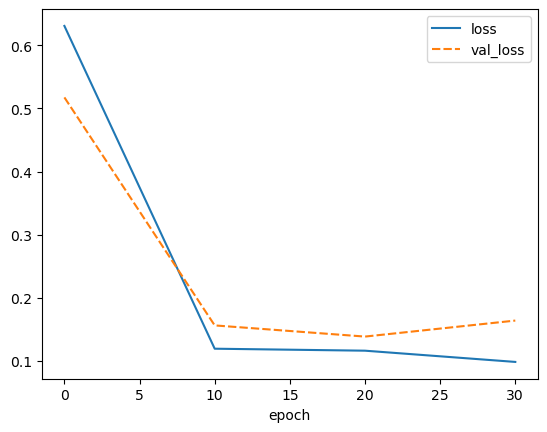

best weights loaded


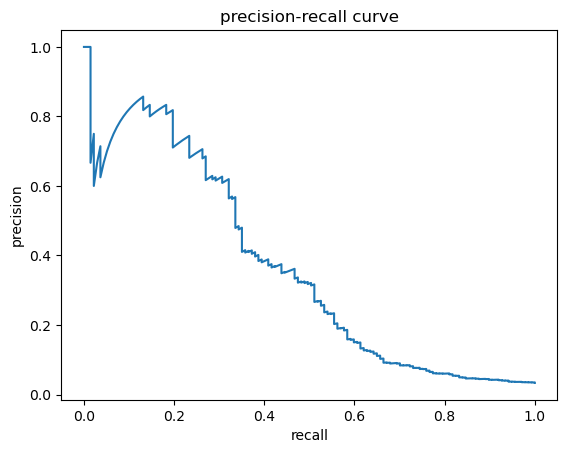

elapsed time: 240.14322996139526
run: 30
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002792F34D0A0>, <torch.utils.data.dataset.Subset object at 0x0000027A6A80DB80>, <torch.utils.data.dataset.Subset object at 0x0000027A6A8160D0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_f

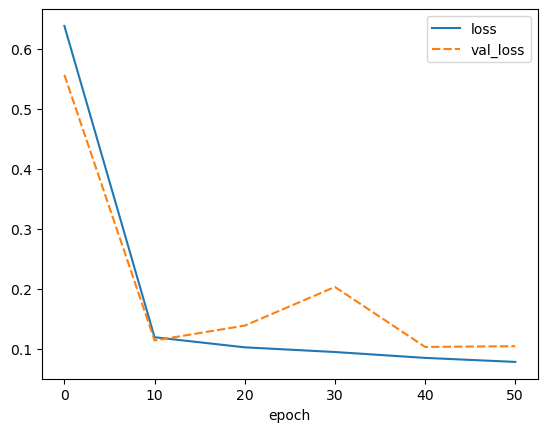

best weights loaded


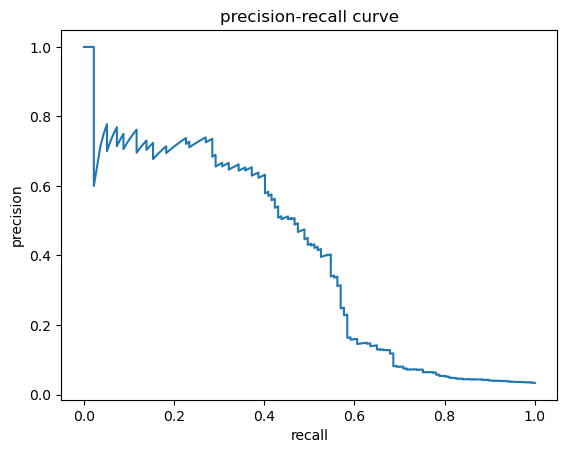

elapsed time: 324.35264897346497
run: 31
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000279394CC7F0>, <torch.utils.data.dataset.Subset object at 0x0000027A6A81ABE0>, <torch.utils.data.dataset.Subset object at 0x0000027A6A81A6D0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_f

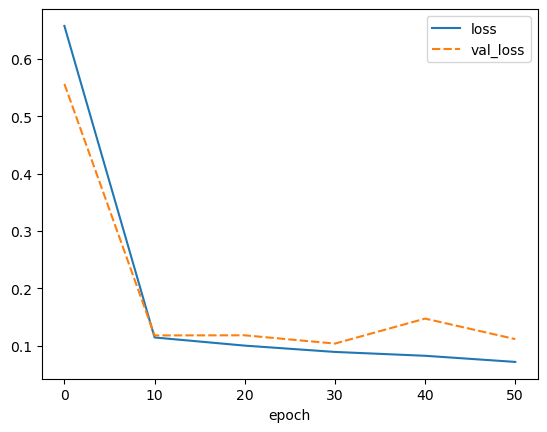

best weights loaded


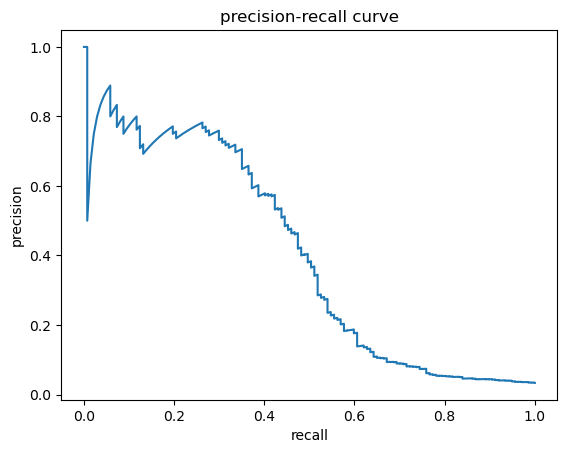

elapsed time: 370.5185775756836
run: 32
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x000002793B472670>, <torch.utils.data.dataset.Subset object at 0x000002793F386190>, <torch.utils.data.dataset.Subset object at 0x000002793F3865B0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_fe

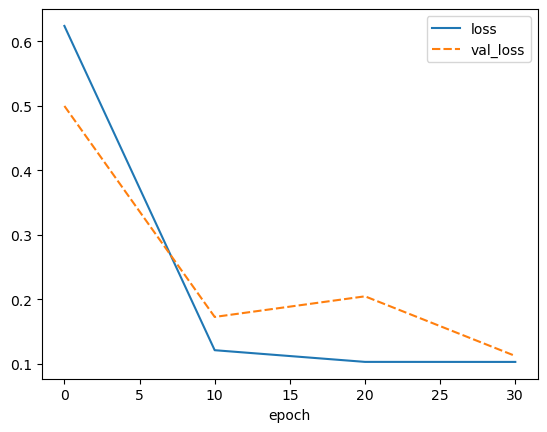

best weights loaded


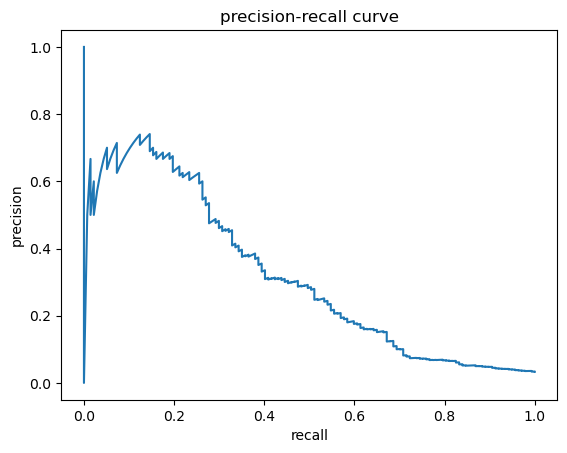

elapsed time: 281.233962059021
run: 33
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027947186550>, <torch.utils.data.dataset.Subset object at 0x0000027A318735E0>, <torch.utils.data.dataset.Subset object at 0x0000027A318739A0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(i

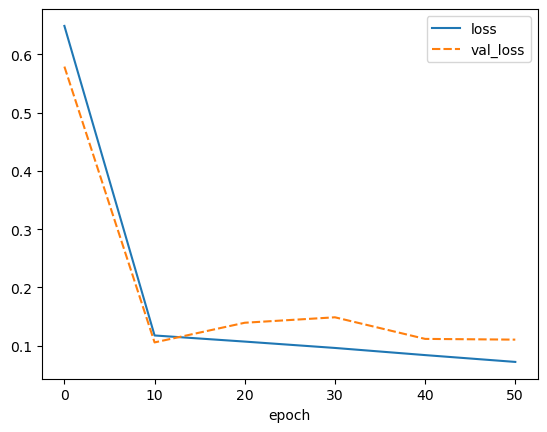

best weights loaded


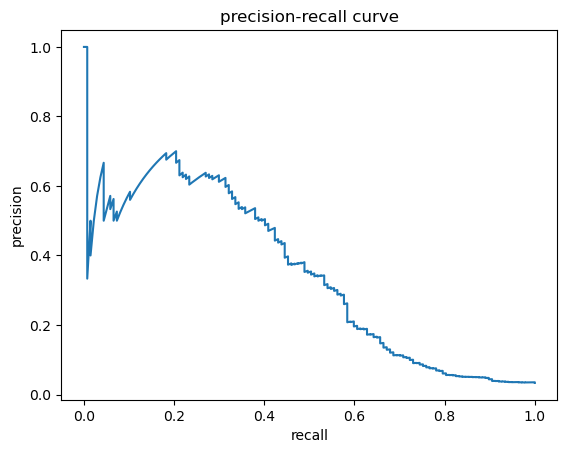

elapsed time: 389.1577003002167
run: 34
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x00000279421B3FA0>, <torch.utils.data.dataset.Subset object at 0x0000027A6A84FC40>, <torch.utils.data.dataset.Subset object at 0x0000027A6A8551C0>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(

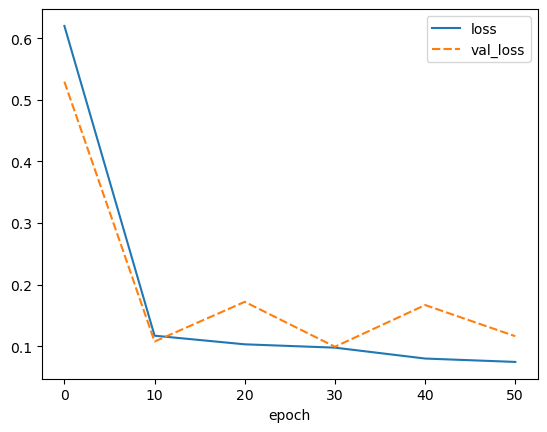

best weights loaded


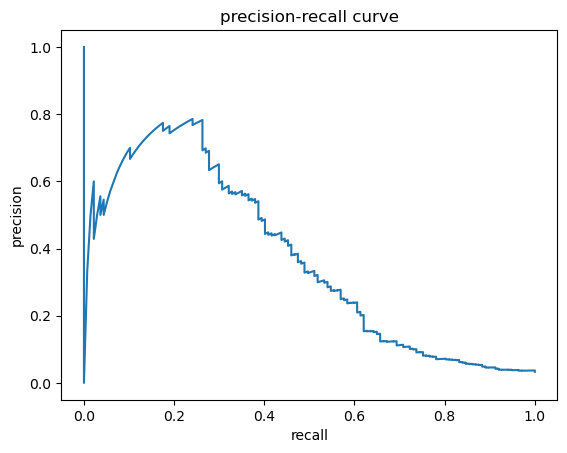

elapsed time: 349.0174295902252
run: 35
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': False}
[<torch.utils.data.dataset.Subset object at 0x0000027940910D60>, <torch.utils.data.dataset.Subset object at 0x0000027A6A855520>, <torch.utils.data.dataset.Subset object at 0x0000027A6A855880>]
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x000002791D23DE50>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(

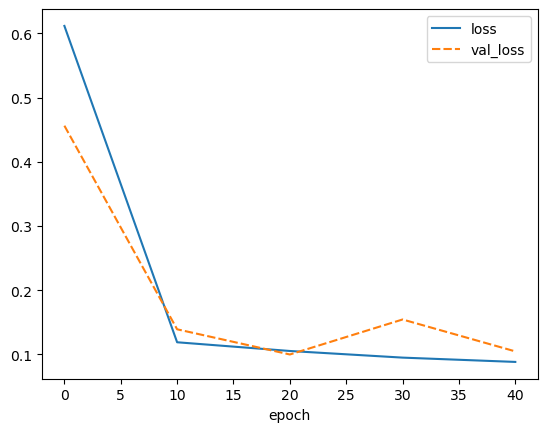

best weights loaded


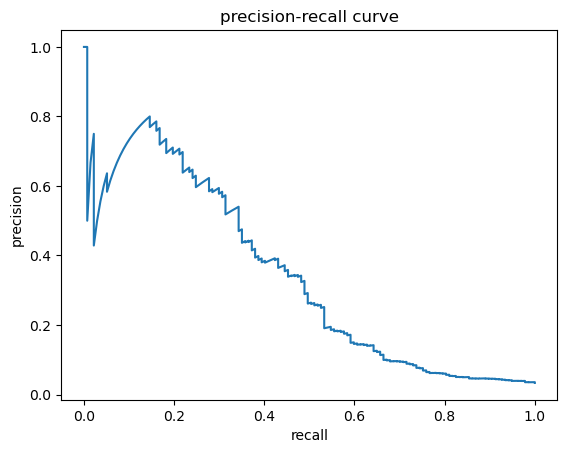

elapsed time: 291.0138523578644


In [14]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    '''
    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 
    '''
    hidden_feats = combination_dict["hidden_feats"]
    predictor_hidden_feats = combination_dict["predictor_hidden_feats"]

    if create_new_data:
        data, data_y = load_hiv()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage=0.1, apply_scaffold_split = apply_scaffold_split )
        #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
        loader, test_loader, val_loader = create_dgl_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_class_hiv.pkl'
        else: 
            loader_file = 'datasets_class_hiv.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders

        train_dataset, test_dataset, val_dataset = create_dgl_sets(datasets=[train_dataset, test_dataset, val_dataset])

        '''
        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)

        else:
        '''
            
        #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
        loader, test_loader, val_loader = create_dgl_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    #if not use_fingerprints:
    #model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)
    model, device, optimizer, loss_fn = initialize_dgl_classification_model(in_feats=train_dataset[0][0].ndata["h"].shape[-1], hidden_feats=hidden_feats, gnn_norm=None, activation=None, residual=None, batchnorm=None, dropout=None, classifier_dropout=0.0, n_tasks=1, predictor_hidden_feats=predictor_hidden_feats, predictor_dropout=0.0)

    #model, best_model_weights, losses, val_losses = regression_train(model, loader, test_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
    model, best_model_weights, losses, val_losses = classification_dgl_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 20, finally_plot_losses = True)
    
    plt.show()
    #mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)
    precisions, recalls, thresholds, dfs = predict_dgl_classification(model, test_loader, device, best_model_weights, plot_final = True)

    '''
    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, test_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)
    '''


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #classification
    save_dict["precisions"] = precisions
    save_dict["recalls"] = recalls
    save_dict["thresholds"] = thresholds
    from sklearn.metrics import precision_recall_curve, auc
    save_dict["auc"] = auc(recalls, precisions)

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    '''
    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
    '''

    save_dict["hidden_feats"] = hidden_feats
    save_dict["predictor_hidden_feats"] = predictor_hidden_feats

    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    